In [1]:
from sklearn.decomposition import PCA
from torchvision import models, transforms
from PIL import Image
import pandas as pd
import numpy as np
import torch

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "5"

In [2]:
activation = {}
def getActivation(name):
    # the hook signature
    def hook(model, input, output):
#         print(input)
        activation[name] = input[0].detach()
    return hook

In [3]:
model = models.resnet18().to("cuda")
model.fc.register_forward_hook(getActivation('fc'))



to_tens = transforms.ToTensor()

# pca.fit(X)

In [4]:
torch.save({
            'model_state_dict': model.state_dict(),
        },  "./pca_feature_extractor.torch")

In [5]:
mex_feats, phl_feats, tan_feats = [], [], []

for country in os.listdir("../dimagery/"):
    for school in os.listdir("../dimagery/" + country):
        school_id = school.split("_")[1].split(".")[0]
        im = to_tens(np.array(Image.open("../dimagery/" + country + "/" + school).convert("RGB"))).unsqueeze(0).to("cuda")
        feats = model(im)
        
        if country == "mex":
            mex_feats.append(activation["fc"][0].detach().cpu().numpy())
        if country == "phl":
            phl_feats.append(activation["fc"][0].detach().cpu().numpy())
        if country == "tan":
            tan_feats.append(activation["fc"][0].detach().cpu().numpy())
            
#         print(activation["fc"][0].shape)
        
#         print(feats)

#     break

/opt/conda/envs/caoe/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
pca = PCA(n_components = 2)
pca.fit(np.array(mex_feats))
pd.DataFrame(pca.transform(np.array(mex_feats))).to_csv("./pca_feats/mex_feats.csv", index = False)

In [7]:
pca = PCA(n_components = 2)
pca.fit(np.array(phl_feats))
pd.DataFrame(pca.transform(np.array(phl_feats))).to_csv("./pca_feats/phl_feats.csv", index = False)

In [8]:
pca = PCA(n_components = 2)
pca.fit(np.array(tan_feats))
pd.DataFrame(pca.transform(np.array(tan_feats))).to_csv("./pca_feats/tan_feats.csv", index = False)

In [9]:
import matplotlib.pyplot as plt

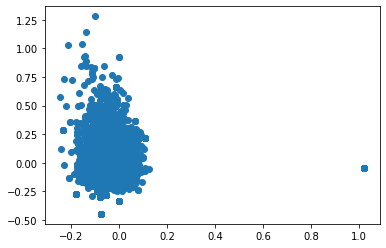

In [10]:
mex_df = pd.read_csv("./pca_feats/mex_feats.csv")
plt.scatter(x = mex_df["0"], y = mex_df["1"])

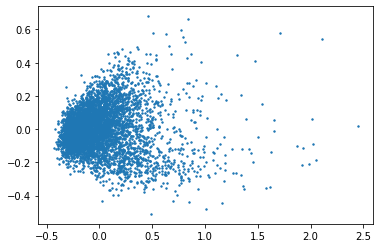

In [16]:
phl_df = pd.read_csv("./pca_feats/phl_feats.csv")
plt.scatter(x = phl_df["0"], y = phl_df["1"], s = 2)

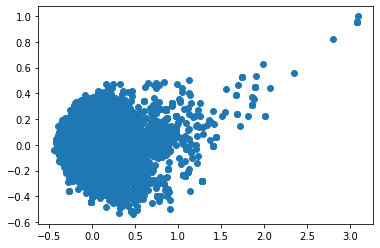

In [12]:
tan_df = pd.read_csv("./pca_feats/tan_feats.csv")
plt.scatter(x = tan_df["0"], y = tan_df["1"])

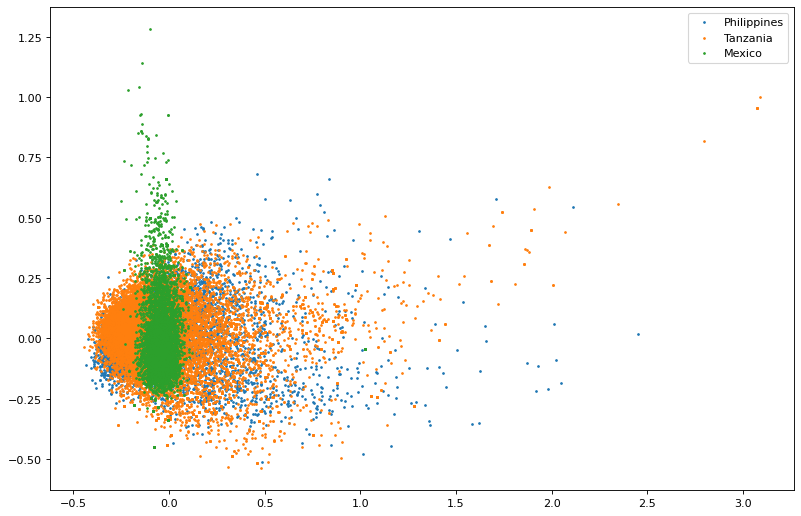

In [23]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)

plt.scatter(x = phl_df["0"], y = phl_df["1"], s = 2)
plt.scatter(x = tan_df["0"], y = tan_df["1"], s = 2)
plt.scatter(x = mex_df["0"], y = mex_df["1"], s = 2)
plt.legend(["Philippines", "Tanzania", "Mexico"])
plt.savefig("./figures/country_feats_scatterplot.png")